![Ironhack logo](https://i.imgur.com/1QgrNNw.png)

# SHARK ATTACK

## Hipótese e Pergunta:
- Homens surfistas de 20 a 30 anos são os que possuem maiores possibilidades de sofrerem ataques de tubarão
- Qual mês que tem mais ataque de tubarão? (tubarão ataca mais na água quente ou em meses quentes tem mais gente na água e logo mais ataques de tubarão?

In [1]:
import pandas as pd
import numpy as np
import re
!pip install seaborn
import seaborn as sns


In [2]:
df=pd.read_csv('attacks.csv', sep=',', index_col = 0, encoding='latin-1')

In [3]:
df_bkp = df.copy()

## Analisando os dados da planilha:

<AxesSubplot:ylabel='Case Number'>

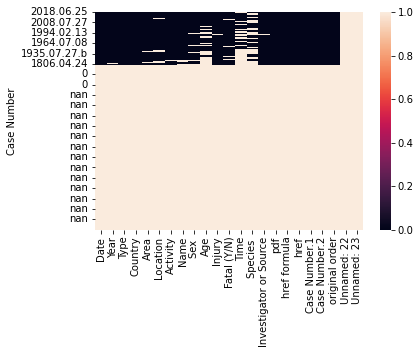

In [4]:
sns.heatmap(df.isnull())

In [5]:
df.head()

,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,...,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
Case Number,,,,,,,,,,,,,,,,,,,,,
2018.06.25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,57,...,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303.0,NaN,NaN
2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,11,...,NaN,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18,2018.06.18,6302.0,NaN,NaN
2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,48,...,NaN,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09,2018.06.09,6301.0,NaN,NaN
2018.06.08,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,NaN,...,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.08,2018.06.08,6300.0,NaN,NaN
2018.06.04,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,NaN,...,"Tiger shark, 3m",A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.04,2018.06.04,6299.0,NaN,NaN


In [6]:
df.shape

(25723, 23)

In [7]:
df.columns

Index(['Date', 'Year', 'Type', 'Country', 'Area', 'Location', 'Activity',
       'Name', 'Sex ', 'Age', 'Injury', 'Fatal (Y/N)', 'Time', 'Species ',
       'Investigator or Source', 'pdf', 'href formula', 'href',
       'Case Number.1', 'Case Number.2', 'original order', 'Unnamed: 22',
       'Unnamed: 23'],
      dtype='object')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 25723 entries, 2018.06.25 to xx
Data columns (total 23 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Date                    6302 non-null   object 
 1   Year                    6300 non-null   float64
 2   Type                    6298 non-null   object 
 3   Country                 6252 non-null   object 
 4   Area                    5847 non-null   object 
 5   Location                5762 non-null   object 
 6   Activity                5758 non-null   object 
 7   Name                    6092 non-null   object 
 8   Sex                     5737 non-null   object 
 9   Age                     3471 non-null   object 
 10  Injury                  6274 non-null   object 
 11  Fatal (Y/N)             5763 non-null   object 
 12  Time                    2948 non-null   object 
 13  Species                 3464 non-null   object 
 14  Investigator or Source  6285 non-null

### Let's drop columns 21 and 22 with only one non-null element

In [9]:
df=df.drop(columns=['Unnamed: 22', 'Unnamed: 23'])

### 'Fixing' some columns

In [10]:
countrygrp = df.groupby(['Country'])

In [11]:
countrygrp.get_group('USA')

,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,...,Fatal (Y/N),Time,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order
Case Number,,,,,,,,,,,,,,,,,,,,,
2018.06.25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,57,...,N,18h00,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303.0
2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,11,...,N,14h00 -15h00,NaN,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18,2018.06.18,6302.0
2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,48,...,N,07h45,NaN,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09,2018.06.09,6301.0
2018.05.27,27-May-2018,2018.0,Unprovoked,USA,Florida,"Lighhouse Point Park, Ponce Inlet, Volusia County",Fishing,male,M,52,...,N,NaN,"Lemon shark, 3'","K. McMurray, TrackingSharks.com",2018.05.27-Ponce.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.05.27,2018.05.27,6296.0
2018.05.26.b,26-May-2018,2018.0,Unprovoked,USA,Florida,"Cocoa Beach, Brevard County",Walking,Cody High,M,15,...,N,17h00,"Bull shark, 6'","K.McMurray, TrackingSharks.com",2018.05.26.b-High.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.05.26.b,2018.05.26.b,6295.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ND.0056,Before 1958,0.0,Unprovoked,USA,Florida,"Palm Beach, Palm Beach County",Standing,Horton Chase,M,NaN,...,N,NaN,NaN,"V.M. Coppleson (1956), p.255; R.F. Hutton",ND-0056-HortonChase.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0056,ND.0056,54.0
ND.0019,Before 1921,0.0,Unprovoked,USA,Florida,"Gadsden Point, Tampa Bay",Fishing,James Kelley,M,NaN,...,N,NaN,NaN,"T. Helm, p.219",ND-0019-Kelley.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0019,ND.0019,20.0
ND.0014,Before 17-Jul-1916,0.0,Unprovoked,USA,North Carolina,Somewhere between Hatteras and Beaufort,Swimming,"""youthful male""",M,NaN,...,N,NaN,NaN,"C. Creswell, GSAF; Wilmington Star, 7/17/1916",ND-0014-pre1916-NorthCarolina.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0014,ND.0014,15.0


In [12]:
countrygrp['Activity'].value_counts().head(20)

Country                     Activity                                                                                                                                  
 PHILIPPINES                USS Hoel DD 533 sunk on 10/24/1944 in the Battle off Samar. 2 crewmen were swimmng alongside a floater net &                                  1
 TONGA                      Five men on makeshift raft after their 10 m fishing boat  capsized and sank in rough seas. Survivors rescued after  7.5 hours in the water    2
                            Scuba diving                                                                                                                                  1
AFRICA                      Jumped into river                                                                                                                             1
ALGERIA                     Swimming                                                                                                             

In [13]:
countrygrp['sex'].value_counts().loc['BRAZIL']

KeyError: 'Column not found: sex'

In [ ]:
df=df.drop(columns=['Unnamed: 22', 'Unnamed: 23'])

In [ ]:
df=df[df.Age.astype(str).str.isdigit()]

In [ ]:
df['Age'] = df.Age.astype('int')

In [ ]:
df.Activity.isna().sum()

In [ ]:
df.Age.dtypes

In [ ]:
df = df.reset_index(drop=True)

In [ ]:
df.shape

In [ ]:
df.Age.unique()

In [ ]:
df['Age'].describe()

SEX COLUMN

In [ ]:
df.rename(columns={'Sex ':'sex'}, inplace=True)

In [ ]:
df['sex'] = df['sex'].replace(['lli'], 'M')
df['sex'] = df['sex'].replace(['M '], 'M')

#### Function to show the month

In [ ]:
def find_month(string):
    months = ["Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Oct","Nov","Dec"]
    try:
        for month in months:
            if re.search(month,string):
                return month
    except TypeError:
        return 'Unknown'

In [ ]:
month = [(find_month(date)) for date in df.Date]
print (month)

In [ ]:
df = df.assign(Month = month)

In [ ]:
df.Month.value_counts()

In [ ]:
df = df[(df.Month =='Jan')| (df.Month =='Feb')| (df.Month =='Mar')| (df.Month =='Apr')| (df.Month =='May')| (df.Month =='Jun')| (df.Month =='Jul')| (df.Month =='Aug')| (df.Month =='Sep')| (df.Month =='Oct')| (df.Month =='Nov')| (df.Month =='Dec')]

In [ ]:
df.Month.value_counts(normalize=True).sort_values(ascending=False)

## Starting Analysis

In [ ]:
countrygrp = df.groupby(['Country'])

In [ ]:
dfint.groupby(['sex'])[['Age']].mean().sort_values(by=['Age'])

In [ ]:
countrygrp = dfint.groupby(['Country'])

In [ ]:
countrygrp['Age'].mean()

In [ ]:
countrygrp['Age'].mean().loc['USA']

In [ ]:
countrygrp['Age'].mean().loc['AUSTRALIA']

In [ ]:
countrygrp['Age'].agg(['mean','median','count']).sort_values(by='count',ascending=False)

In [ ]:
countrygrp['Age'].agg(['mean','median']).loc['USA']

In [ ]:
countrygrp['Month'].count().sort_values(ascending=False)

In [ ]:
countrygrp['Activity'].value_counts().sort_values(ascending=False)

In [ ]:
df.Activity.value_counts(normalize=True).sort_values(ascending=False)

In [ ]:
countrygrp['Month'].count().sort_values(ascending=False)

In [ ]:
actgrp = df.groupby(['Activity'])

In [ ]:
actgrp['Age'].mean().sort_values(ascending=False).loc['Surfing']

In [ ]:
df2 = df.groupby(['Country']).agg(Attacks=('Country','count')).sort_values(by='Attacks', ascending=False)

In [ ]:
df2['%'] = round((df2.Attacks/df2.Attacks.sum())*100,2)
df2

In [ ]:
pd.options.display.min_rows = 100

In [ ]:
df.groupby(['Country','Month']).agg(Attacks=('Country','count')).sort_values(by='Attacks', ascending=False)

In [ ]:
df.groupby(['Country','Activity','Month']).agg(Attacks=('Country','count')).sort_values(by='Attacks', ascending=False)

In [ ]:
df.groupby(['Country','Month']).agg(Attacks=('Country','count'), Age=('Age','mean')).sort_values(by='Attacks', ascending=False)

In [ ]:
df.groupby(['Country','sex']).agg(Attacks=('Country','count'), Age=('Age','mean')).sort_values(by='Attacks', ascending=False)

In [ ]:
df.groupby(['Country','Activity','sex']).agg(Attacks=('Country','count'), Age=('Age','mean')).sort_values(by='Attacks', ascending=False)

In [ ]:
df.groupby(['Country','Month','sex']).agg(Attacks=('Country','count'), Age=('Age','mean')).sort_values(by='Attacks', ascending=False).head(30)

In [ ]:
df.groupby(['Activity','Country','Month','sex']).agg(Attacks=('Country','count'), Age=('Age','mean')).sort_values(by='Attacks', ascending=False).head(30)